<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%205/GRU_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



In [18]:
# 1. Membuat dataset sinusoidal
data = np.cos(np.linspace(0, 100, 1000))
seq_length = 20

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)


In [19]:
# 2. Definisi model GRU
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1, num_layers=2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out


In [20]:
# 3. Inisialisasi model, loss, optimizer
model = GRUModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [21]:
# 4. Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/50], Loss: 0.0136
Epoch [20/50], Loss: 0.0006
Epoch [30/50], Loss: 0.0011
Epoch [40/50], Loss: 0.0016
Epoch [50/50], Loss: 0.0007


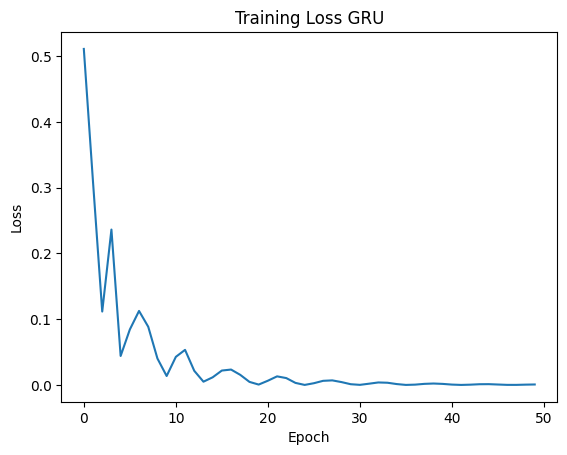

In [22]:
# 5. Plot loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss GRU')
plt.show()


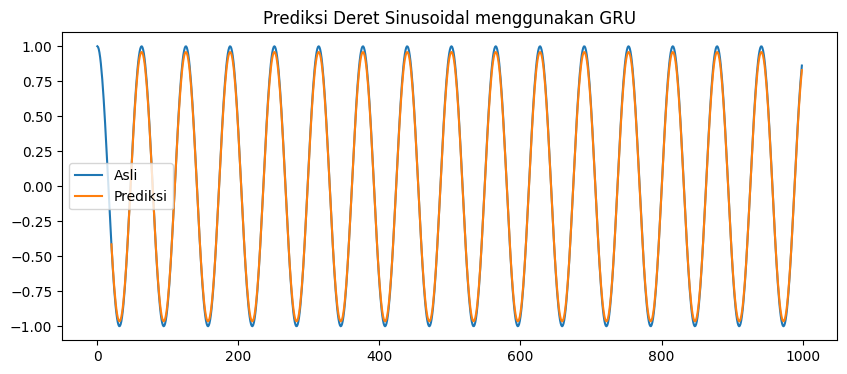

In [23]:
# 6. Prediksi
with torch.no_grad():
    preds = model(X).numpy()

plt.figure(figsize=(10,4))
plt.plot(data, label='Asli')
plt.plot(np.arange(seq_length, len(preds)+seq_length), preds, label='Prediksi')
plt.legend()
plt.title('Prediksi Deret Sinusoidal menggunakan GRU')
plt.show()


In [24]:
hidden_sizes = [32, 64, 128]
print(f"Defined hidden_sizes: {hidden_sizes}")

Defined hidden_sizes: [32, 64, 128]


In [25]:
all_losses = {}
all_predictions = {}
epochs = 50 # Re-using the previously defined number of epochs

for hidden_size in hidden_sizes:
    print(f"Training GRU model with hidden_size: {hidden_size}")

    model = GRUModel(hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    current_losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        current_losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'  Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


    all_losses[hidden_size] = current_losses

    model.eval()
    with torch.no_grad():

        preds = model(X).numpy()
        all_predictions[hidden_size] = preds


    model.train()

print("Training for all hidden sizes complete.")

Training GRU model with hidden_size: 32
  Epoch [10/50], Loss: 0.0475
  Epoch [20/50], Loss: 0.0039
  Epoch [30/50], Loss: 0.0007
  Epoch [40/50], Loss: 0.0004
  Epoch [50/50], Loss: 0.0006
Training GRU model with hidden_size: 64
  Epoch [10/50], Loss: 0.0386
  Epoch [20/50], Loss: 0.0088
  Epoch [30/50], Loss: 0.0027
  Epoch [40/50], Loss: 0.0012
  Epoch [50/50], Loss: 0.0005
Training GRU model with hidden_size: 128
  Epoch [10/50], Loss: 0.0562
  Epoch [20/50], Loss: 0.0142
  Epoch [30/50], Loss: 0.0041
  Epoch [40/50], Loss: 0.0012
  Epoch [50/50], Loss: 0.0005
Training for all hidden sizes complete.
